In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import pearsonr
from scipy.sparse import csr_matrix
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [2]:
# ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

#Loading the Dataset

In [8]:
Jobs_data=pd.read_csv("all_upwork_jobs_next.csv")

In [9]:
Jobs_data.head()# get the head of the dataset

,Unnamed: 0,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,avg_salary,salary,average_hourly,category,year_month,month,year,month_year
0,0,experienced media buyer for solar pannel and r...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,17.339644,41.970610,500.000000,Unknown,29.655127,500.000000,29.655127,Other,2024-02,2,2024,2024-02
1,1,full stack developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,17.339644,41.970610,1100.000000,United States,29.655127,1100.000000,29.655127,Other,2024-02,2,2024,2024-02
2,2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,11.490534,37.044085,20.000000,United States,28.783264,20.000000,24.267310,Other,2024-02,2,2024,2024-02
3,3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,17.339644,41.970610,481.720824,United States,29.655127,481.720824,29.655127,Other,2024-02,2,2024,2024-02
4,4,data engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,17.339644,41.970610,650.000000,India,29.655127,650.000000,29.655127,Other,2024-02,2,2024,2024-02


In [10]:
Jobs_data = Jobs_data.drop(columns=["Unnamed: 0"])# drop the unnamed:column

In [11]:
Jobs_data.isnull().sum()# check the missing value of the dataset

,0
title,0
link,0
published_date,0
is_hourly,0
hourly_low,0
hourly_high,0
budget,0
country,0
avg_salary,0
salary,0


In [12]:
Jobs_data# display the head and tail of the dataset

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,avg_salary,salary,average_hourly,category,year_month,month,year,month_year
0,experienced media buyer for solar pannel and r...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,17.339644,41.970610,500.000000,Unknown,29.655127,500.000000,29.655127,Other,2024-02,2,2024,2024-02
1,full stack developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,17.339644,41.970610,1100.000000,United States,29.655127,1100.000000,29.655127,Other,2024-02,2,2024,2024-02
2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,11.490534,37.044085,20.000000,United States,28.783264,20.000000,24.267310,Other,2024-02,2,2024,2024-02
3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,17.339644,41.970610,481.720824,United States,29.655127,481.720824,29.655127,Other,2024-02,2,2024,2024-02
4,data engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,17.339644,41.970610,650.000000,India,29.655127,650.000000,29.655127,Other,2024-02,2,2024,2024-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244823,need facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.000000,44.926525,60.000000,Zambia,28.783264,60.000000,32.463262,Other,2024-03,3,2024,2024-03
244824,digital/telemarketing/sales/outside sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,17.339644,41.970610,100.000000,Sri Lanka,29.655127,100.000000,29.655127,Other,2024-03,3,2024,2024-03
244825,wordpress template edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,11.490534,37.044085,17.500000,United States,28.783264,17.500000,24.267310,Other,2024-03,3,2024,2024-03
244826,elementor pro for quick fix (wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,17.339644,41.970610,15.000000,France,29.655127,15.000000,29.655127,Other,2024-03,3,2024,2024-03


# Task 4: Compare average hourly rates across different countries

● Objective: To compare and analyze the average hourly rates offered across different geographical locations.

● Deliverables: An interactive map or chart showing hourly rates by country.

In [13]:
Jobs_data['country'].unique()# check the unique no of the country column

array(['Unknown', 'United States', 'India', 'Portugal', 'Germany',
       'Canada', 'Singapore', 'United Kingdom', 'Denmark', 'Malaysia',
       'Bangladesh', 'Saudi Arabia', 'Australia', 'Ukraine', 'Pakistan',
       'Nigeria', 'Peru', 'Costa Rica', 'Switzerland', 'France', 'China',
       'Israel', 'Hong Kong', 'Serbia', 'Bahrain', 'Thailand', 'Spain',
       'Croatia', 'Luxembourg', 'Kenya', 'Finland', 'Bulgaria', 'Georgia',
       'New Zealand', 'Lebanon', 'Uzbekistan', 'Palestinian Territories',
       'Italy', 'Egypt', 'Albania', 'Netherlands', 'Mexico', 'Azerbaijan',
       'Norway', 'Sweden', 'Czech Republic', 'United Arab Emirates',
       'Uganda', 'South Africa', 'Honduras', 'Argentina', 'Belgium',
       'Cyprus', 'Ecuador', 'Philippines', 'Puerto Rico', 'Holy See',
       'Greece', 'Brazil', 'Morocco', 'Estonia', 'Poland', 'Iceland',
       'Indonesia', 'Kuwait', 'Ireland', 'Panama', 'Jordan', 'Qatar',
       'Tanzania', 'Turkey', 'Slovakia',
       'Micronesia, Federated 

In [14]:
import pandas as pd
import plotly.express as px

# Filter out non-hourly jobs
hourly_jobs = Jobs_data[Jobs_data['is_hourly'] == True].copy()

# Calculate the average hourly rate
hourly_jobs.loc[:, 'average_hourly_rate'] = hourly_jobs[['hourly_low', 'hourly_high']].mean(axis=1)

# Drop rows with missing country or average hourly rate
hourly_jobs = hourly_jobs.dropna(subset=['country', 'average_hourly_rate'])

# Calculate average hourly rate by country
country_hourly_rates = hourly_jobs.groupby('country')['average_hourly_rate'].mean().reset_index()

# Rename columns for clarity
country_hourly_rates.columns = ['country', 'avg_hourly_rate']

# Define a custom color scale
custom_color_scale = [
    (0.0, "rgb(165,0,38)"),   # Dark red
    (0.2, "rgb(215,48,39)"),  # Red
    (0.4, "rgb(244,109,67)"), # Orange
    (0.6, "rgb(253,174,97)"), # Light orange
    (0.8, "rgb(254,224,144)"),# Yellow
    (1.0, "rgb(255,255,191)") # Light yellow
]

# Create a choropleth map
fig = px.choropleth(
    country_hourly_rates,
    locations="country",
    locationmode='country names',
    color="avg_hourly_rate",
    hover_name="country",
    color_continuous_scale=custom_color_scale,
    title="Average Hourly Rates by Country"
)

# Update layout for better visuals and increased size
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    title=dict(x=0.5),
    width=1200,   # Set the width of the plot
    height=800    # Set the height of the plot
)

fig.show()


# Task 5: Create a job recommendation engine based on current job postings

● Objective: To develop a personalized job recommendation engine.

● Deliverables: A working prototype of the recommendation engine, API documentation, and a user interface for interaction.

Data Preprocessing

In [15]:
# Combine title and country into a single column for text processing
Jobs_data['text'] = Jobs_data['title'] + " " + Jobs_data['country']

# Display the first few rows
Jobs_data.head(2)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,avg_salary,salary,average_hourly,category,year_month,month,year,month_year,text
0,experienced media buyer for solar pannel and r...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,17.339644,41.97061,500.0,Unknown,29.655127,500.0,29.655127,Other,2024-02,2,2024,2024-02,experienced media buyer for solar pannel and r...
1,full stack developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,17.339644,41.97061,1100.0,United States,29.655127,1100.0,29.655127,Other,2024-02,2,2024,2024-02,full stack developer United States


#Feature Engineering

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(Jobs_data['text'])

# Display the shape of the TF-IDF matrix
tfidf_matrix.shape

(244828, 1000)

#Compute Similarity

In [17]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 26.7 MB/s eta 0:00:00


In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import faiss
import numpy as np

# Combine title and country into a single column for text processing
Jobs_data['text'] = Jobs_data['title'] + " " + Jobs_data['country']

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(Jobs_data['text']).toarray()

# Initialize the FAISS index
d = tfidf_matrix.shape[1]  # Dimension of the vectors
index = faiss.IndexFlatL2(d)  # L2 distance index

# Add vectors to the index
index.add(tfidf_matrix)

def get_recommendations(job_title, n=10):
    # Get the index of the job that matches the job_title
    idx = Jobs_data[Jobs_data['title'].str.contains(job_title, case=False, na=False)].index[0]

    # Get the vector for the job
    job_vector = tfidf_matrix[idx].reshape(1, -1)

    # Search the index for the most similar vectors
    distances, indices = index.search(job_vector, n)

    # Return the most similar jobs
    return Jobs_data.iloc[indices[0]][['title', 'country', 'link']]

# Test the recommendation function
print(get_recommendations('Full Stack Developer'))

                                               title        country  \
1                               full stack developer  United States   
3066                            full stack developer  United States   
4551                            full-stack developer  United States   
8638                            full stack developer  United States   
8651                            full stack developer  United States   
10682                           full stack developer  United States   
11773  full stack developer (individual contributor)  United States   
12459                           full stack developer  United States   
14245                           full-stack developer  United States   
14246                           full-stack developer  United States   

                                                    link  
1      https://www.upwork.com/jobs/Full-Stack-Develop...  
3066   https://www.upwork.com/jobs/Full-Stack-Develop...  
4551   https://www.upwork.com/jobs/Full-s

#Build Recommendation Function

Develop an API

In [21]:
!pip install flask

In [22]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/recommend', methods=['POST'])
def recommend():
    data = request.get_json()
    job_title = data['job_title']
    recommendations = get_recommendations(job_title)
    return recommendations.to_json(orient='records')

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


#Create a User Interface

In [23]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [24]:
import streamlit as st
import requests
import pandas as pd

st.title('Job Recommendation Engine')

job_title = st.text_input('Enter a job title')

if st.button('Get Recommendations'):
    response = requests.post('http://127.0.0.1:5000/recommend', json={'job_title': job_title})
    recommendations = pd.read_json(response.json())
    st.write(recommendations)

2025-01-10 06:45:22.280 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:45:22.469 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-10 06:45:22.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:45:22.483 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:45:22.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:45:22.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:45:22.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:45:22.508 Session state does not 

#Task 6: Track changes in job market dynamics over months

● Objective: To monitor and track the changes in job market dynamics.

● Deliverables: A dashboard that updates monthly with new trends in the job market.

In [25]:
# Ensure 'published_date' is in datetime format
Jobs_data['published_date'] = pd.to_datetime(Jobs_data['published_date'])

# Extract month and year from 'published_date'
Jobs_data['year_month'] = Jobs_data['published_date'].dt.to_period('M')

In [26]:
# Group by 'year_month' to get the count of job postings each month
monthly_job_counts = Jobs_data.groupby('year_month').size().reset_index(name='job_count')

# Convert Period to String

In [27]:
# Convert 'year_month' to string format
monthly_job_counts['year_month'] = monthly_job_counts['year_month'].astype(str)

#Visualization

In [28]:
import plotly.express as px

In [29]:
# Ensure 'published_date' is in datetime format
Jobs_data['published_date'] = pd.to_datetime(Jobs_data['published_date'])

# Extract month and year from 'published_date'
Jobs_data['year_month'] = Jobs_data['published_date'].dt.to_period('M')

# Group by 'year_month' to get the count of job postings each month
monthly_job_counts = Jobs_data.groupby('year_month').size().reset_index(name='job_count')

# Convert 'year_month' to string format
monthly_job_counts['year_month'] = monthly_job_counts['year_month'].astype(str)

# Create a line plot to show job postings over time
fig = px.line(monthly_job_counts, x='year_month', y='job_count', title='Job Postings Over Time', labels={'year_month': 'Month', 'job_count': 'Number of Job Postings'})

# Show the plot
fig.show()

# Monthly Trends in the Job Market

It increases gradually after 31 December, 2023

Using Streamlit

In [31]:
import pandas as pd
import plotly.express as px
import streamlit as st

# Function to load and process data
def load_data():
    Jobs_data = pd.read_csv("/content/all_upwork_jobs_next (1).csv")

    # Ensure 'published_date' is in datetime format and remove timezone information if present
    Jobs_data['published_date'] = pd.to_datetime(Jobs_data['published_date']).dt.tz_localize(None)

    # Extract month and year from 'published_date'
    Jobs_data['year_month'] = Jobs_data['published_date'].dt.to_period('M')

    # Group by 'year_month' to get the count of job postings each month
    monthly_job_counts = Jobs_data.groupby('year_month').size().reset_index(name='job_count')

    # Convert 'year_month' to string format
    monthly_job_counts['year_month'] = monthly_job_counts['year_month'].astype(str)

    return monthly_job_counts

# Load data
monthly_job_counts = load_data()

# Create Streamlit app
st.title('Job Market Dynamics Dashboard')

# Create a line plot to show job postings over time with customizations
fig = px.line(monthly_job_counts, x='year_month', y='job_count', title='Job Postings Over Time', labels={'year_month': 'Month', 'job_count': 'Number of Job Postings'})
fig.update_traces(line=dict(color='royalblue', width=4))
fig.update_layout(width=800, height=600)

# Show the plot
st.plotly_chart(fig)

# Refresh button
if st.button('Refresh Data'):
    st.experimental_rerun()

2025-01-10 06:46:10.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:10.652 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:10.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:10.721 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:10.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:10.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:10.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:10.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [32]:
import pandas as pd
import plotly.express as px
import streamlit as st

# Function to load and process data
def load_data():
    try:
        Jobs_data = pd.read_csv("/content/all_upwork_jobs_next.csv")
        st.write("Data loaded successfully")
    except Exception as e:
        st.error(f"Error loading data: {e}")
        return pd.DataFrame()

    # Ensure 'published_date' is in datetime format and remove timezone information if present
    try:
        Jobs_data['published_date'] = pd.to_datetime(Jobs_data['published_date']).dt.tz_localize(None)
        st.write("Published date converted successfully")
    except Exception as e:
        st.error(f"Error converting published_date: {e}")
        return pd.DataFrame()

    # Extract month and year from 'published_date'
    try:
        Jobs_data['year_month'] = Jobs_data['published_date'].dt.to_period('M')
        st.write("Year and month extracted successfully")
    except Exception as e:
        st.error(f"Error extracting year_month: {e}")
        return pd.DataFrame()

    # Group by 'year_month' to get the count of job postings each month
    try:
        monthly_job_counts = Jobs_data.groupby('year_month').size().reset_index(name='job_count')
        monthly_job_counts['year_month'] = monthly_job_counts['year_month'].astype(str)
        st.write("Monthly job counts calculated successfully")
    except Exception as e:
        st.error(f"Error calculating monthly job counts: {e}")
        return pd.DataFrame()

    return monthly_job_counts

    # Load data
monthly_job_counts = load_data()

# Check if data is not empty
if monthly_job_counts.empty:
    st.error("No data to display")
else:
    st.write("Processed data:", monthly_job_counts.head())

    # Create Streamlit app
    st.title('Job Market Dynamics Dashboard')

    # Create a line plot to show job postings over time with customizations
    fig = px.line(monthly_job_counts, x='year_month', y='job_count',
                  title='Job Postings Over Time',
                  labels={'year_month': 'Month', 'job_count': 'Number of Job Postings'})
    fig.update_traces(line=dict(color='royalblue', width=4))
    fig.update_layout(width=800, height=600)

    # Show the plot
    st.plotly_chart(fig)

    # Refresh button
    if st.button('Refresh Data'):
        st.experimental_rerun()

2025-01-10 06:46:15.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:15.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:15.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:15.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


# Forecasting

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqhlxva_/nz6_1ki0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqhlxva_/klb56z9_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79094', 'data', 'file=/tmp/tmpoqhlxva_/nz6_1ki0.json', 'init=/tmp/tmpoqhlxva_/klb56z9_.json', 'output', 'file=/tmp/tmpoqhlxva_/prophet_model9y4q34r9/prophet_model-20250110064642.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:46:42 - cmdstanpy - INFO - Chain [1] start processing
IN

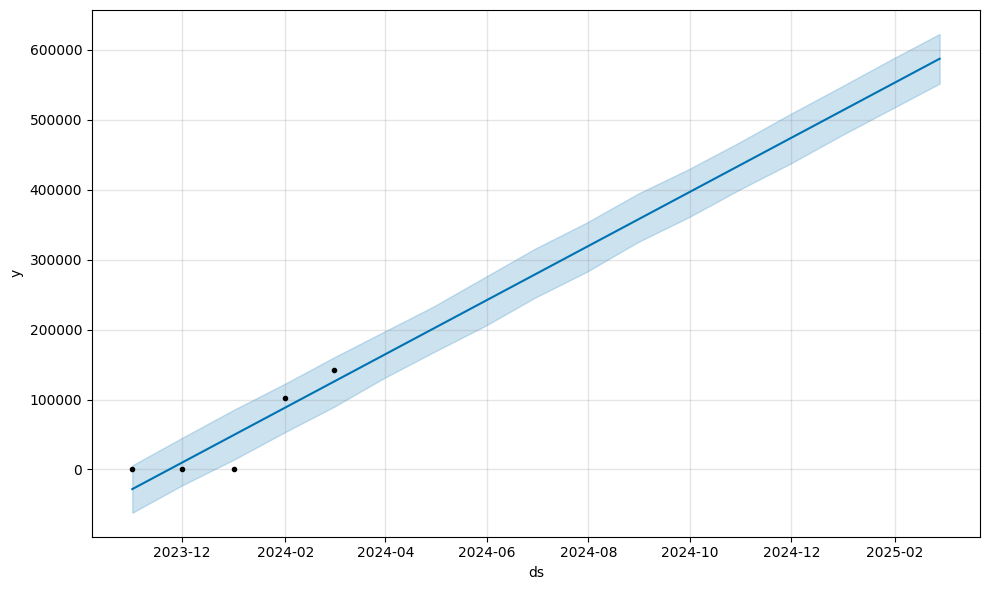

In [34]:
import pandas as pd
import plotly.express as px
import streamlit as st
from prophet import Prophet

# Function to load and process data
def load_data():
    Jobs_data = pd.read_csv("/content/all_upwork_jobs_next (1).csv")
    Jobs_data['published_date'] = pd.to_datetime(Jobs_data['published_date']).dt.tz_localize(None)
    Jobs_data['year_month'] = Jobs_data['published_date'].dt.to_period('M')
    monthly_job_counts = Jobs_data.groupby('year_month').size().reset_index(name='job_count')
    monthly_job_counts['year_month'] = monthly_job_counts['year_month'].astype(str)
    return monthly_job_counts

# Load data
monthly_job_counts = load_data()

# Use monthly_job_counts instead of monthly_remote_job_counts
monthly_job_counts['ds'] = pd.to_datetime(monthly_job_counts['year_month'])
monthly_job_counts['y'] = monthly_job_counts['job_count']
prophet_df = monthly_job_counts[['ds', 'y']]

# Initialize and fit Prophet model
model = Prophet()
model.fit(prophet_df)

# Create future dataframe and make predictions
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot the forecast
fig_forecast = model.plot(forecast)

# Streamlit app to display forecast
st.title('Remote Work Forecast')
st.write("Forecast data:", forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
st.write(fig_forecast)

#Comprehensive Report

In [35]:
import matplotlib.pyplot as plt
from prophet import Prophet

# ... (your previous code to create 'forecast') ...

# Generate and display the forecast plot
fig_forecast = model.plot(forecast)  # Create the forecast figure
st.pyplot(fig_forecast)

# Generate and display the trends plot
st.plotly_chart(fig)

# Summary and insights
st.header('Summary and Insights')
st.write("""
- The number of remote job postings has shown [increase] over the past months.
- According to the forecast, the trend is expected to [continue] in the coming year.
- Key factors influencing this trend include factors such as industry changes, economic conditions, etc.
""")

2025-01-10 06:46:57.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:57.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:57.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:57.809 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:57.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:57.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:57.817 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-10 06:46:57.819 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

# Task 8: Predict future job market trends

● Objective: To use the analyzed data to predict future trends in the job market.

● Deliverables: A predictive analytics report with potential future scenarios

In [36]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqhlxva_/24m4rx8a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoqhlxva_/5vcptvvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83297', 'data', 'file=/tmp/tmpoqhlxva_/24m4rx8a.json', 'init=/tmp/tmpoqhlxva_/5vcptvvh.json', 'output', 'file=/tmp/tmpoqhlxva_/prophet_model94uf0cwq/prophet_model-20250110064736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:47:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:48:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


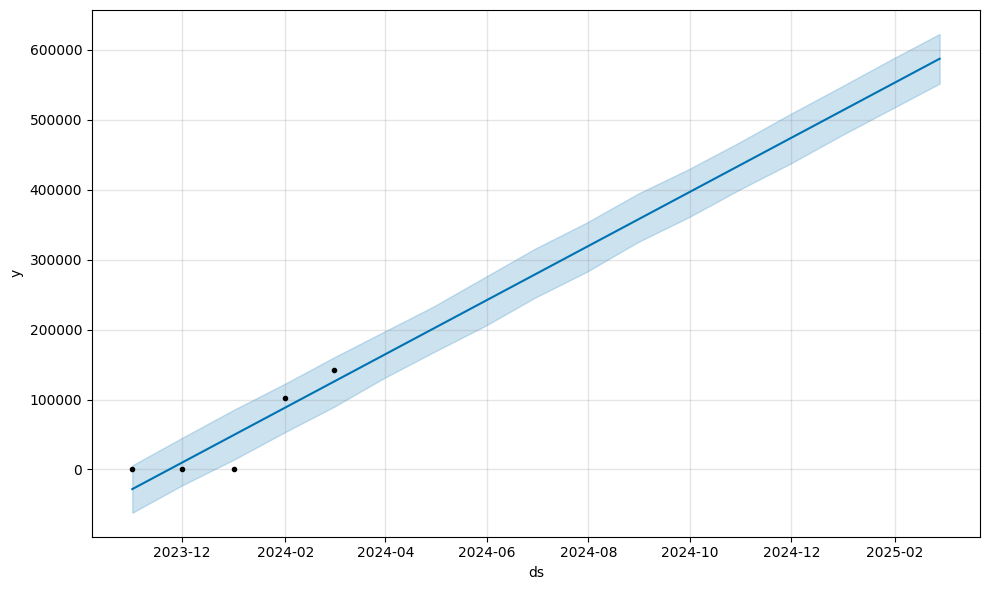

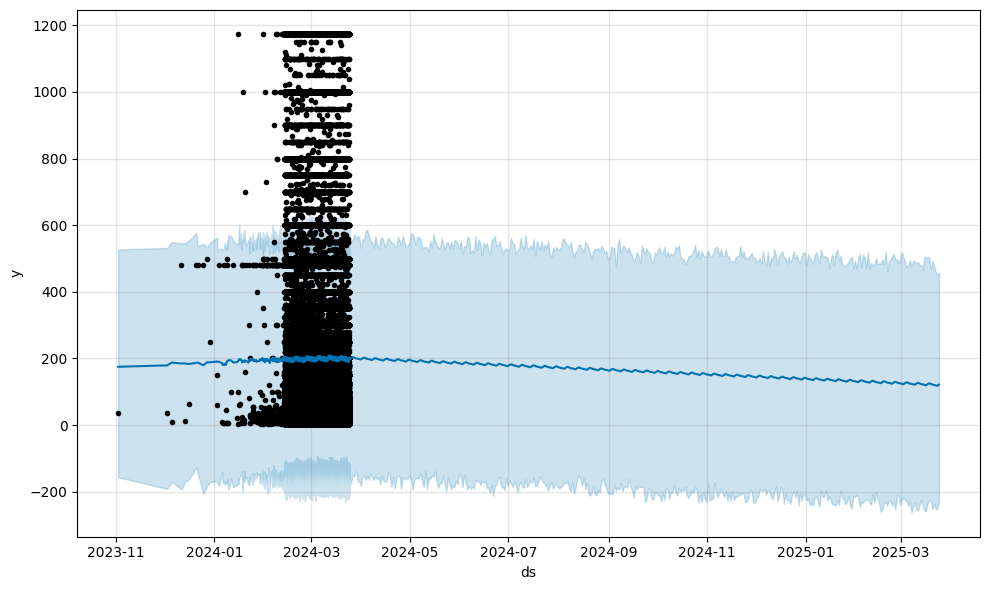

In [38]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Ensure plots are displayed in the notebook
%matplotlib inline

# Load your dataset
df = pd.read_csv('/content/all_upwork_jobs_next (1).csv')

# Convert 'published_date' column to datetime
df['published_date'] = pd.to_datetime(df['published_date'])

# Remove timezone information from 'published_date' column
df['published_date'] = df['published_date'].dt.tz_localize(None)

# Rename columns for Prophet compatibility
df = df.rename(columns={'published_date': 'ds', 'budget': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=365)  # Predicting for the next year
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# Show the plot
plt.show()

In [39]:
# Generate predictive analytics report
with open('job_market_trends_report.txt', 'w') as f:
    f.write('Job Market Trends Predictive Analytics Report\n')
    f.write('='*80 + '\n\n')
    f.write('Forecasted Job Postings for Next 12 Months:\n')
    f.write(forecast.to_string())

print("Report generated: job_market_trends_report.txt")

Report generated: job_market_trends_report.txt
